In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_style('whitegrid')
sns.set_palette('pastel') 

In [2]:
df = pd.read_csv("/kaggle/input/listings-airbnb/listings2.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20230922223244,2023-09-23,city scrape,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,611179,https://www.airbnb.com/rooms/611179,20230922223244,2023-09-23,city scrape,Condo in Mexico City · 1 bedroom · 2 beds · 1....,LOTS OF SPACE AND STYLE. ROMANTIC. <br />AMAZI...,"Mexico City's historic center, declared a Worl...",https://a0.muscache.com/pictures/7734976/9633d...,1297488,...,4.00,3.00,4.00,NaN,f,6,6,0,0,0.01
2,611337,https://www.airbnb.com/rooms/611337,20230922223244,2023-09-23,city scrape,Condo in Mexico City · ★5.0 · 2 bedrooms · 4 b...,IDEAL FOR 2 COUPLES OR 4 FRIENDS <br />LOTS O...,"Mexico City's historic center, declared a Worl...",https://a0.muscache.com/pictures/51547139/b996...,1297488,...,5.00,5.00,5.00,NaN,f,6,6,0,0,0.04
3,613181,https://www.airbnb.com/rooms/613181,20230922223244,2023-09-23,city scrape,Rental unit in Mexico City · ★4.76 · 2 bedroom...,"Couples history with comfort, playful elegance...",Casa Tezontle is in Mexico’s City Historic Dow...,https://a0.muscache.com/pictures/9084124/44864...,3040937,...,4.95,4.73,4.72,NaN,t,1,1,0,0,1.47
4,617137,https://www.airbnb.com/rooms/617137,20230922223244,2023-09-23,previous scrape,Rental unit in Mexico City · 1 bedroom · 1 bed...,<b>The space</b><br />All services. 2 rooms. 1...,NaN,https://a0.muscache.com/pictures/9187120/91a96...,3059169,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN


# Introduction

Searching for a hotel when going on vacation can be very expensive, and sometimes we don't even have the time to look for a place. That's why a lot of people opt for Airbnb. According to `searchlogistics`, Airbnb has more than 150 million worldwide users who have booked over 1.5 billion stays, and there are currently over 5+ million Airbnb hosts worldwide and 7.7+ million active listings on the platform. Due to the increasing number of listings on the platform, choosing a property has become harder than it was in past years. To solve this, this document details the creation of a price prediction tool in the form of a Web Browser Extension. This tool aims to reduce the time it takes for a user to find a good deal. This analysis will be focused on Mexico, specifically in Mexico City. This project will be divided into two parts, the model training and the deployment.

<img src="https://www.searchlogistics.com/wp-content/uploads/2022/08/Airbnb-Statistics-Graphic-10.jpg" width=400>

**(SearchLogistics, 2022)**

# Data Description

The data was recovered from `https://insideairbnb.com/get-the-data/` it is stored into a CSV file named `listings.csv`. 
Some information about the dataset such as the number of instances, features and column types are described below.

In [3]:
print(f"The dataset has a shape of {df.shape}")

The dataset has a shape of (26318, 75)


In [4]:
print("Columns with NaN values")

df.columns[df.isna().sum()>0]

Columns with NaN values


Index(['description', 'neighborhood_overview', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'neighbourhood',
       'neighbourhood_group_cleansed', 'bathrooms', 'bathrooms_text',
       'bedrooms', 'beds', 'calendar_updated', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

In [5]:
print("Non categorical columns")

df.columns[df.dtypes!=object]

Non categorical columns


Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_hos

In [6]:
print("Categorical columns")

df.columns[df.dtypes == object]

Categorical columns


Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'instant_bookable'],
      dtype='object')

# Data Preprocessing

The preprocessing pipeline consists on the following steps:

1. Column Removal: Removes specific columns from the dataset, such as those related to URLs, those with a high number of NaN values, and others that are unnecessary for analysis.

2. Date Conversion: Converts date columns to a format that can be fed to the model, converting dates to type int64.

3. Percentage Conversion: Transforms columns containing percentages (such as host acceptance rate or response rate) from strings to floating-point values.

4. String to Boolean Conversion: Converts columns representing boolean values (like 'f' for false and 't' for true) to numerical values (0 for false, 1 for true).

5. Currency Conversion: Converts the price column from a string to a floating-point number, extracting the numerical value from the string representing the price.

5. Bathroom Conversion: Converts the column describing the number of bathrooms from a string to a floating-point number, extracting the numerical value from the string.

6. List Unpacking: Unpacks lists into separate columns, particularly the host verification list, converting each list element into a binary column.

7. Categorical Variable Encoding: Encodes categorical variables using ordinal encoding, assigning a numerical value to each category, and handles missing values by imputing them with "NS" (Not Specified).

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Data cleaning pipeline
steps = []
mapping_dict = {}

def remove_columns(df):
    df = df.copy()
    # URLs columns
    columns = [col for col in df.columns if "url" in col or "calculated" in col]
    # High number of NaN values
    columns = columns + df.columns[df.isna().sum()>len(df)*.2].to_list()
    # Unnecesary columns
    columns = columns + ["id", "scrape_id", "source", "name", "host_id", 
                         "host_name", "description", "last_scraped", "calendar_last_scraped"]
    #Drop Columns
    df.drop(columns=columns, inplace = True)
    return df

steps.append(('remove_columns', remove_columns))

def convert_dates(df):
    df = df.copy()
    # Convert datetime columns
    datetime_cols = ["host_since", "first_review", "last_review"]

    for col in datetime_cols:
        # Datetime to int64 to feed the model
        df[col] = pd.to_datetime(df[col])
        df.loc[~df[col].isna(), col] = df.loc[~df[col].isna(), col].astype("int64")
        df[col] = df[col].fillna(np.nan)
    
    return df

date_columns = df.select_dtypes(include=["datetime64[ns]"]).columns
  
steps.append(("convert_dates", convert_dates))

def convert_percentage(df):
    def clean_number(df, column):
        # Extract numbers
        fill_values = df[column].str.extract("([0-9]+)")[0]
        df[column] = fill_values
        df[column] = df[column].astype(float)

    df = df.copy()
    # Convert percentage string cols into float
    percentage_cols = ["host_acceptance_rate", "host_response_rate"]
    for col in percentage_cols:
        clean_number(df, col)
    
    return df

steps.append(("convert_percentage", convert_percentage))

def convert_string_to_boolean(df):
    def convert_boolean(df, column):
        fill_values = df[column].dropna()=="f"
        df.loc[~df[column].isna(), column] = fill_values
        df[column] = df[column].astype(float)

    df = df.copy()
    # Convert boolean cols from string to boolean (f to 0, t to 1)
    boolean_cols = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "has_availability", "instant_bookable"]
    for col in boolean_cols:
        convert_boolean(df, col)
    
    return df

steps.append(("convert_string_to_boolean", convert_string_to_boolean))

def convert_money(df):
    df = df.copy()
    # Price is converted from string to a float number
    column = "price"
    fill_values = df[column].str.extract("\$([0-9,]+)")[0].str.replace(",", "")
    df[column] = fill_values.astype(float)

    return df

steps.append(("convert_money", convert_money))

def convert_bathrooms(df):
    df = df.copy()
    # Convert bathrooms string into a float number
    column = "bathrooms_text"
    fill_values = df[column].dropna().str.extract("([0-9.]+)")[0]
    df[column] = fill_values.astype(float)

    return df

steps.append(("convert_bathrooms", convert_bathrooms))

def unpack_lists(df):
    from sklearn.preprocessing import MultiLabelBinarizer
    df = df.copy()
    # Convert host_verifications into multiple binary columns
    # columns = ["host_verifications", "amenities"]
    # Amenities won't be used in this analysis due to the scope of this project
    df.drop(columns = "amenities", inplace=True)
    columns = ["host_verifications"]
    for column in columns:
        df[column] = df[column].fillna("[]")
        unpacked = df[column].apply(eval)
        # MultiLabelBinarizer will transform each list of labels into several binary columns
        mlb = MultiLabelBinarizer()
        unpacked_binary = mlb.fit_transform(unpacked)
        unpacked_df = pd.DataFrame(unpacked_binary, columns=mlb.classes_)
        min_ocurrence = 50
        cols = unpacked_df.columns[unpacked_df.sum()>min_ocurrence]
        unpacked_df = unpacked_df[cols]
        # Add the new binary columns to the dataframe
        df.drop(columns=[column], inplace=True)
        df = pd.concat([df.reset_index(drop=True), unpacked_df], axis=1)

    return df

steps.append(("unpack_lists", unpack_lists))

def encode_categorical(df):
    df = df.copy()
    # Encode categorical variables using ordinal encoding
    # Single value imputing with NS(Not specified) for categorical encoding
    df["host_response_time"].fillna("NS", inplace=True)
    
    # Apply ordinal encoding to data
    categorical_columns = df.select_dtypes(include=[object]).columns
    for col in categorical_columns:
        encoded_values, categories = pd.factorize(df[col])
        mapping_dict[col] = dict(enumerate((categories)))
        df[col] = encoded_values
    
    return df

steps.append(("encode_categorical", encode_categorical))

steps = [(i[0], FunctionTransformer(i[1])) for i in steps]

In [8]:
data_preprocessing = Pipeline(steps, verbose=1)
df = data_preprocessing.fit_transform(df)

[Pipeline] .... (step 1 of 8) Processing remove_columns, total=   0.1s
[Pipeline] ..... (step 2 of 8) Processing convert_dates, total=   0.2s


/tmp/ipykernel_24/3253829609.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1277683200000000000 1318723200000000000 1318723200000000000 ...
 1577664000000000000 1692576000000000000 1622073600000000000]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[~df[col].isna(), col] = df.loc[~df[col].isna(), col].astype("int64")
/tmp/ipykernel_24/3253829609.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(np.nan)
/tmp/ipykernel_24/3253829609.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1476662400000000000 143907840000

[Pipeline]  (step 3 of 8) Processing convert_percentage, total=   0.2s
[Pipeline]  (step 4 of 8) Processing convert_string_to_boolean, total=   0.1s
[Pipeline] ..... (step 5 of 8) Processing convert_money, total=   0.1s
[Pipeline] . (step 6 of 8) Processing convert_bathrooms, total=   0.1s
[Pipeline] ...... (step 7 of 8) Processing unpack_lists, total=   0.4s
[Pipeline]  (step 8 of 8) Processing encode_categorical, total=   0.0s


/tmp/ipykernel_24/3253829609.py:125: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["host_response_time"].fillna("NS", inplace=True)


In [9]:
print("New categorial encoded columns")

# Categorical encoded columns
for col in mapping_dict.keys():
    print(f"-{col}")

New categorial encoded columns
-host_response_time
-neighbourhood_cleansed
-property_type
-room_type


## Data Visualization

The data visualization is going to be divided into: 

1. Categorical columns

    Due to the ordinal encoding of this columns the relationships maybe won't be linear, so they will not be seen in the correlation matrix.

### Categorical columns

In [10]:
def plot_categorical_column(df, col):
    df = df.copy()
    fig, ax = plt.subplots(1, 2, figsize=(12,5))

    # Properties by column
    df[col] = df[[col]].replace(mapping_dict)[col]
    value_counts = df[col].value_counts(ascending=True)

    # Limit to 15 categories for better visualization
    value_counts = value_counts[value_counts.rank(method="max", ascending=False)<=15]

    # Horizontal bar plot
    ax[0].barh(value_counts.index, value_counts)

    # Columns
    x = "price"

    df = df[df[col].isin(value_counts.index)]

    # Custom order based on median
    order = df[[x, col]].groupby(col)[x].median().sort_values(ascending=False).index

    # Boxplot of the price vs. neighbourhood type suppressing the outliers 
    sns.boxplot(df, y=col, x=x, showfliers=False, order=order, ax=ax[1])

    plt.tight_layout()
    plt.show()

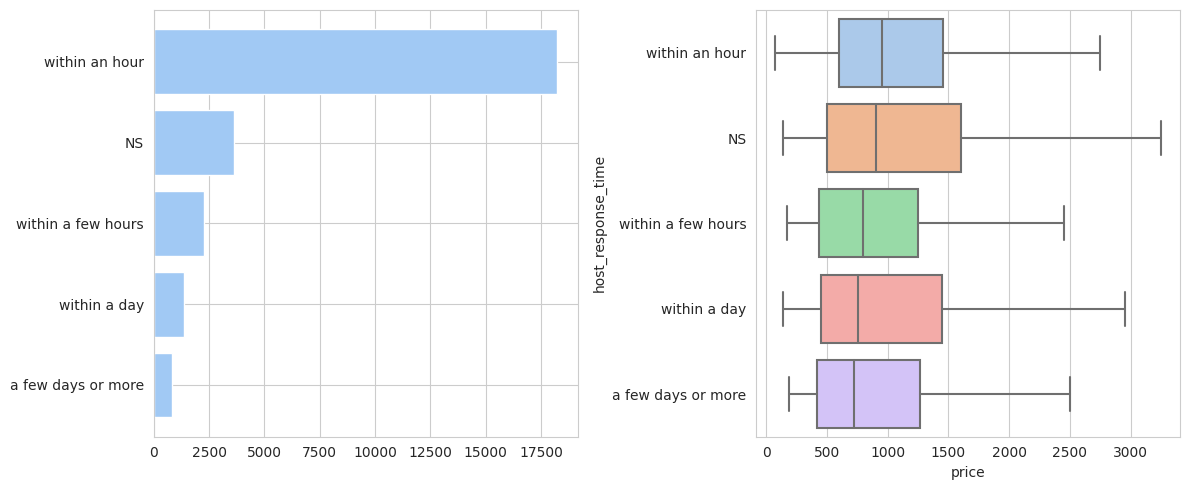

In [11]:
# Host response time
plot_categorical_column(df, "host_response_time")

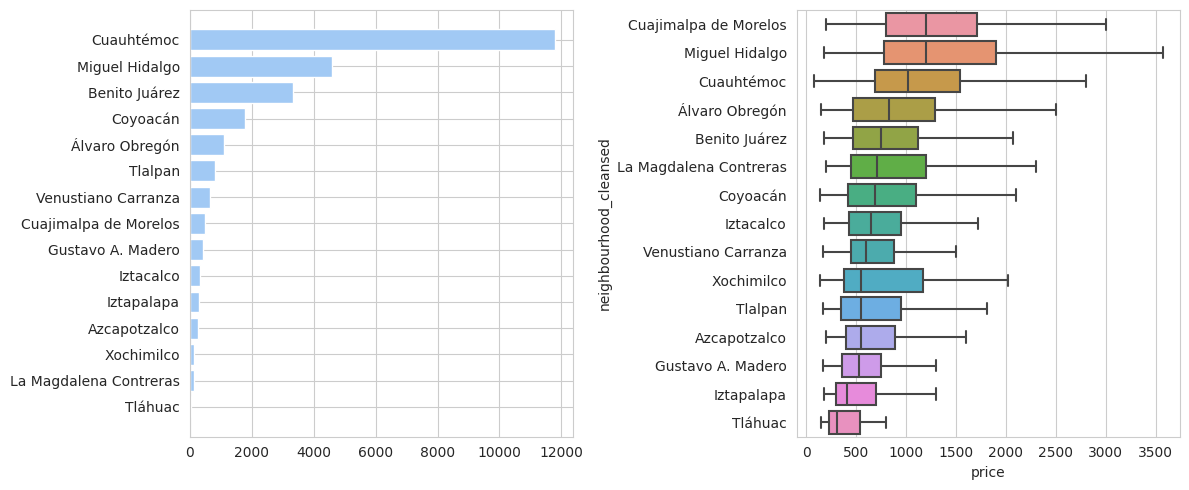

In [12]:
# Neighborhood
plot_categorical_column(df, "neighbourhood_cleansed")

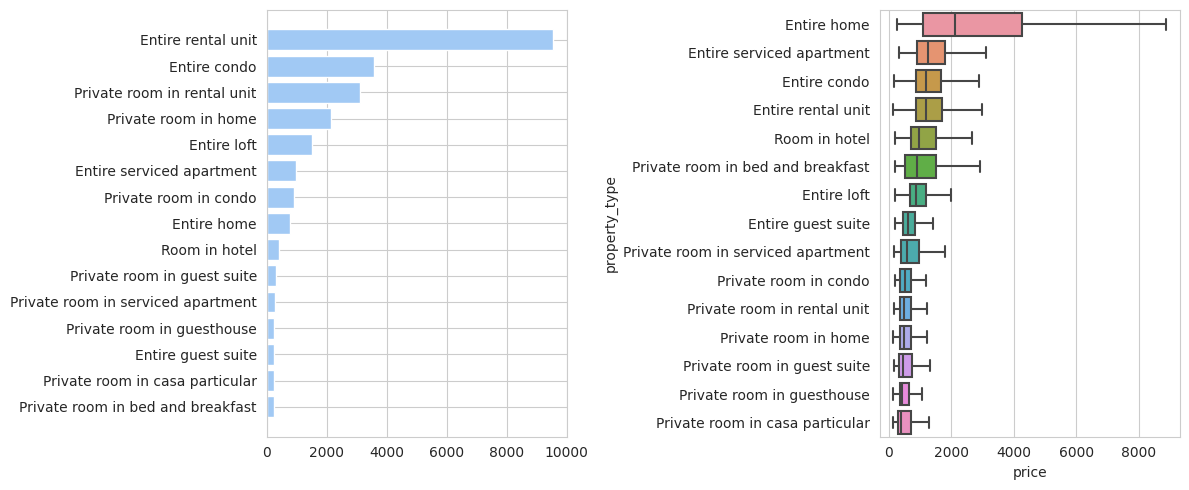

In [13]:
# Property Type
plot_categorical_column(df, "property_type")

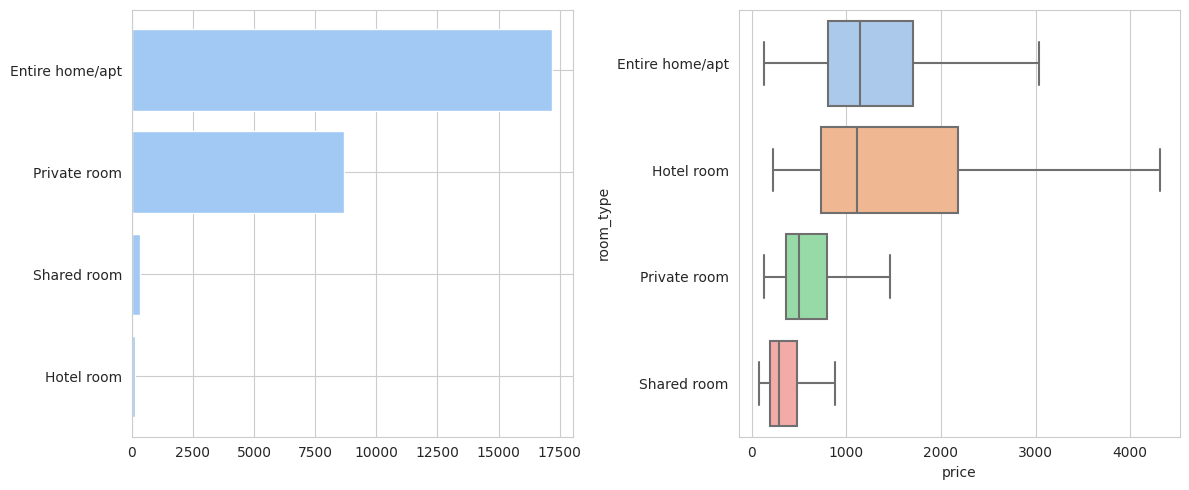

In [14]:
# Room Type
plot_categorical_column(df, "room_type")

As it was expected, the categorical column that describe properties characteristics, such as the location, the type of property or the type of room seem to be having an impact on the property price. This relations will be further explored in order to understand if there is any correlation between them and the target variable (property_price).

### Boolean Columns

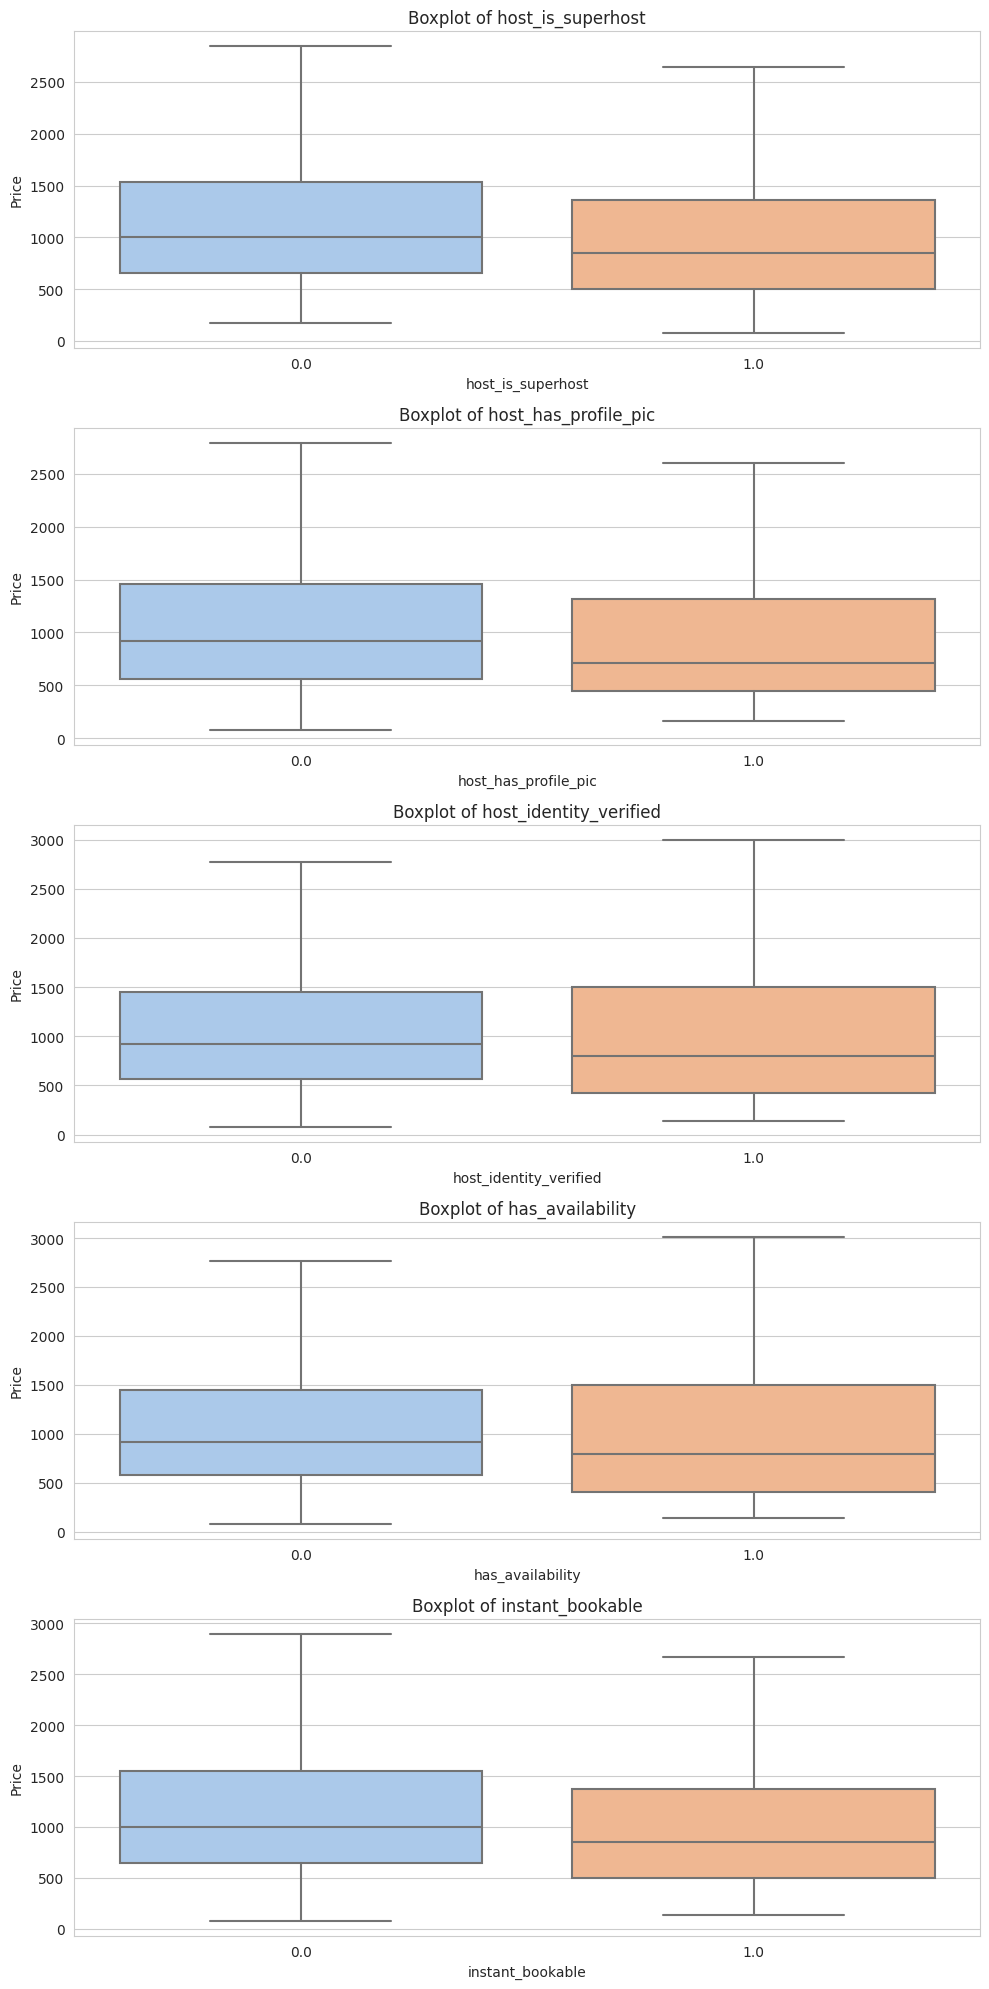

In [15]:
boolean_cols = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "has_availability", "instant_bookable"]

fig, axes = plt.subplots(nrows=len(boolean_cols), figsize=(10, 20))

#  Plotting the boxplots for each column
for i, col in enumerate(boolean_cols):
    sns.boxplot(x=col, y='price', data=df, ax=axes[i], showfliers=False)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

The boolean columns doesn't seem to be having a significant effect on the property price, there is no visually identifiable difference between groups.

### Correlation Matrix

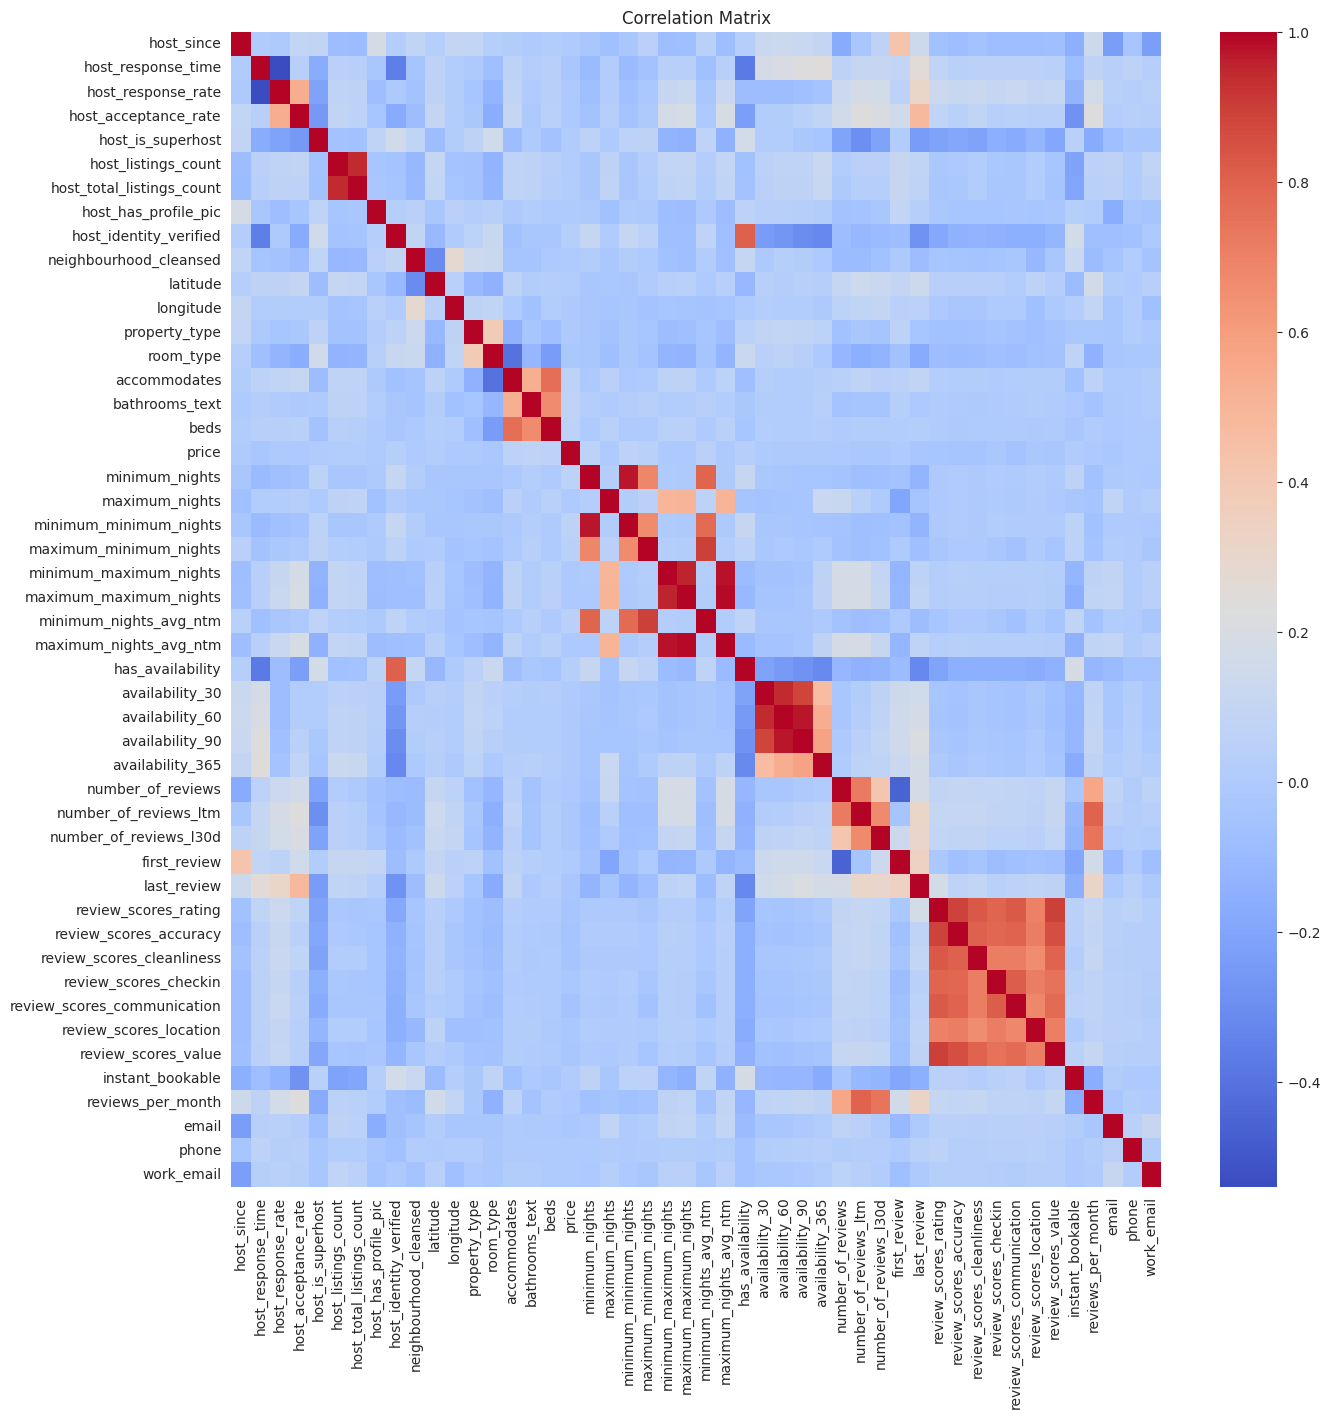

In [16]:
# Correlation matrix calculation
correlation_matrix = df.corr()

# Crear un heatmap to detect possible multicolinearity problems
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can observe some multicolinearity problems, mostly on the review scores, the availability and the number of nights you can stay. Due to the quantity of columns a Lasso Regression will be applied as a Feature Selection and Multicolinearity reduction technique. 

Aditionally, there are no significantly goog relations between the variables and the price, however, the relation between these variables is not necessarily linear, so it's necessary exploring non linear methods for the final model.


## Feature Selection

Due to the multicolinearity problem and the objective of this project, it's necessary to apply feature selection techniques. A Lasso Regression will be applied to the train data using a Validation Curve to identify the best alpha parameter considering a balance between the Mean Absolute Error of the train and test set, and the number of features.

In [17]:
steps = []

def drop_outliers(df):
    df = df.copy()
    
    # Drop outliers to boost model performance and reduce the error
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)

    IQR = Q3 - Q1
    # Remove data that is more than 1.5*IQR from either side of the median
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

    # Drop rows where price value is NaN
    df.dropna(subset="price", inplace=True)

    return df

steps.append(("drop_outliers", drop_outliers))

def split_impute_scale_select(df, vc_lasso = False):
    from sklearn.model_selection import train_test_split
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import Lasso

    df = df.copy()
    # Convert entire df to float
    df = df.astype(np.float64)
    X = df.drop(columns="price").copy()
    y = df["price"]
    # Split into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

    # Impute values using most_frequent value
    imputer = SimpleImputer(strategy="most_frequent")

    # impute values for both training and testing set to avoid data leakage
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Scale the data with a standard scaler
    scaler = StandardScaler()
    # Fit on training data and transform train an test set
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    if vc_lasso:
        return X_train, X_test, y_train, y_test, X, y
    
    # Lasso model for multicolinearity detection and feature selection, the election of alpha parameter is described below
    lasso_model = Lasso(alpha=np.logspace(0, 2, 6)[2], max_iter=200000)
    lasso_model.fit(X_train, y_train)

    # Get mask of features that are not zero
    columns_index = lasso_model.coef_ != 0
    X_train = X_train[:, columns_index]
    X_test = X_test[:, columns_index]

    return X_train, X_test, y_train, y_test, X, columns_index

steps.append(("split_impute_values", split_impute_scale_select))

steps = [(i[0], FunctionTransformer(i[1])) for i in steps]

In [18]:
outlier_deletion = Pipeline(steps[: -1], verbose=1)
ndf = outlier_deletion.fit_transform(df)

X_train, X_test, y_train, y_test, X, y = split_impute_scale_select(ndf, vc_lasso=True)

[Pipeline] ..... (step 1 of 1) Processing drop_outliers, total=   0.0s


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

def custom_validation_curve(X_train, X_test, y_train, y_test, param_range, cv, scoring):
    train_scores = []
    test_scores = []
    num_features = []
    selected_features = []

    for alpha in param_range:
        model = Lasso(alpha=alpha)
        # Fit the model
        model.fit(X_train, y_train)
        # Number of selected features
        selected_features_index = model.coef_ != 0
        selected_features.append(selected_features_index)
        num_selected_features = np.sum(selected_features_index)
        num_features.append(num_selected_features)
        # Train and test scores
        train_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
        train_scores.append(train_score)

        test_score = cross_val_score(model, X_test, y_test, cv=cv, scoring=scoring)
        test_scores.append(test_score)

    return train_scores, test_scores, num_features, selected_features

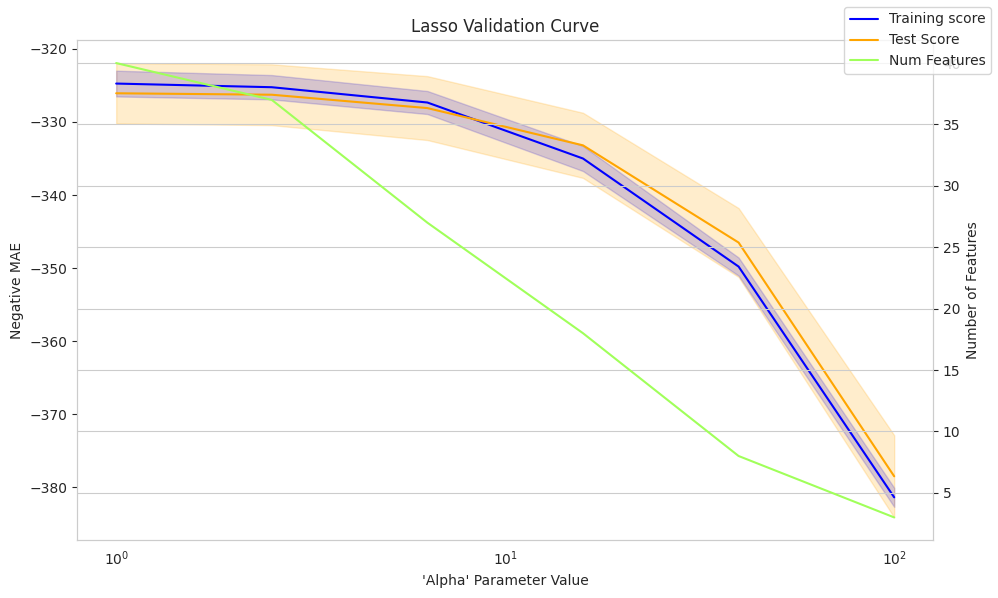

In [20]:
from sklearn.linear_model import Lasso

# Set the param_range of the validation curve
param_range = np.logspace(0, 2, 6) 

# Define a Lasso model
model = Lasso(max_iter = 100000)

# Validation curve for alpha parameter
train_scores, test_scores, num_features, selected_features_index = custom_validation_curve(
    X_train, X_test, y_train, y_test, param_range=param_range, cv=4, scoring="neg_mean_absolute_error"
)

# Calculate the mean scores and the std deviation of the test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title("Lasso Validation Curve")
ax1.set_xlabel("'Alpha' Parameter Value")
ax1.set_ylabel("Negative MAE")
ax1.semilogx(param_range, train_mean, label="Training score", color="blue")
ax1.fill_between(
    param_range,
    train_mean - train_std,
    train_mean + train_std,
    color="blue",
    alpha=0.2
)
ax1.semilogx(param_range, test_mean, label="Test Score", color="orange")
ax1.fill_between(
    param_range,
    test_mean - test_std,
    test_mean + test_std,
    color="orange",
    alpha=0.2
)

ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = '#A0FF5A'
ax2.set_ylabel('Number of Features')
ax2.plot(param_range, num_features, label="Num Features", color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
fig.legend()

ax1.grid()
plt.show()

The election of the alpha parameter will be the third element of the logspace (6.31), because it reduces the number of parameters and does not significantly affect the performance of the model.

In [21]:
# We choose the alpha value of 15.85 because it reduces the number of features
# without greatly reducing the performance of the model
np.logspace(0, 2, 6)[2]

6.3095734448019325

In [22]:
print("The selected columns are")

X.iloc[:, selected_features_index[2]].columns

The selected columns are


Index(['host_response_time', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'beds',
       'minimum_minimum_nights', 'minimum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_90', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'work_email'],
      dtype='object')

In [23]:
# Feature selection pipeline using the previously defined alpha value
feature_selection = Pipeline(steps, verbose=1)
X_train, X_test, y_train, y_test, X, columns_index = feature_selection.fit_transform(df)

[Pipeline] ..... (step 1 of 2) Processing drop_outliers, total=   0.0s
[Pipeline]  (step 2 of 2) Processing split_impute_values, total=   0.1s


# Model Selection

Various non-linear models will be explored to identify the best choice. The goal is to find a model that minimizes the Mean Absolute Error.

The model for this project will be selected amongst:
1. Gradient Boosting Regressor
2. Random Forest Classifier
3. Decision Trees

Due to the objectives of the project and the proposed architecture (detailed below) this analysis won't be using deep learning techniques. This is because the model will be deployed to AWS Lambda and TensorFlow is a heavy package. Aditionally, techniques such as K Neighbors Regressor and Support Vector Regression won't be taken into account because these iterative Techniques doesn't work well on a great quantity of data.

In [24]:
class ModelEvaluator:
    def __init__(self, models, params):
        assert len(models) == len(params), "Number of models and parameters must be the same"
        self.models = models
        self.params = params

    def _eval_model(self, model, param_grid, X, y, X_test, y_test, cv=4, n_iter=10, verbose=1, n_jobs=None):
        from sklearn.model_selection import RandomizedSearchCV

        # Apply cross validation to the model with the parameter grid
        search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=n_iter,
                                    scoring="neg_mean_absolute_error", cv=cv, verbose=verbose, n_jobs=n_jobs, random_state=1)

        # Fit the model on the training data and predict on the test set
        search.fit(X, y)
        y_pred = search.best_estimator_.predict(X_test)

        # Get the error of the pred
        error = np.array(y_test - y_pred)

        return {
            'model_name': str(type(model)),
            'best_params': search.best_params_,
            'best_score': search.best_score_,
            'cv_results': search.cv_results_,
            'best_model_error': error
        }
    
    def eval_models(self, X, y, X_test, y_test):
        # Eval each model
        return [self._eval_model(model, params, X, y, X_test, y_test) for model, params in zip(self.models, self.params)]

In [25]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

GBR = GradientBoostingRegressor()
RF = RandomForestRegressor()
DT = DecisionTreeRegressor()

GBR_params = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "max_depth": [3, 5, 7, 10]
}

RF_params = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [3, 5, 10, 20]
}

DT_params = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

models = [GBR, RF, DT]
params = [GBR_params, RF_params, DT_params]


evaluator = ModelEvaluator(models, params)

results = evaluator.eval_models(X_train, y_train, X_test, y_test)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits


In [26]:
# Results checkpoint saving

import json
def convert_array_to_list(d):
    for key, value in d.items():
        if isinstance(value, np.ndarray):
            d[key] = value.tolist()
        elif isinstance(value, dict):
            convert_array_to_list(value)

for item in results:
    convert_array_to_list(item)

# Write results to data.json
json_string = json.dumps(results, indent=2)
file_name = "data.json"
with open(file_name, "w") as f:
    f.write(json_string)

## Final Model

<Axes: >

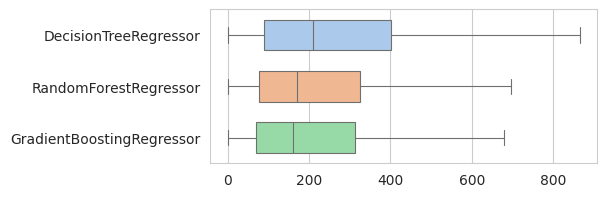

In [27]:
# Get the errors of each Regressor
get_name = lambda class_: re.match("<class 'sklearn.[a-z]+\.[_a-zA-Z]+\.([a-zA-Z]+)", class_).group(1)
errors = {get_name(elem["model_name"]): 
          elem["best_model_error"] for elem in results}

# Create a DataFrame and obtain the absolute values
eval_df = pd.DataFrame(errors).abs()

# Obtain the descending order
order = eval_df.mean().sort_values(ascending=False).index

# Boxplot
plt.figure(figsize=(5, 2))
sns.boxplot(data=eval_df, orient="h", showfliers = False, linewidth=0.8, width=0.6, order=order.to_list())

With the previous Boxplot it's easy to identify that the model with the lowest median of the absolute error its Gradient Boosting Regressor, it also has the lowest inter-quartile range, making it the best performing model. However, the Random Forest Regressor has a similar performance. On the other side the Decision Tree Regressor is showing a higher inter-quartile range, which is expected because a decision tree is always more likely to overfit than an ensemble techniques.

# Deployment
Will be added soon. Including schema and all the details.

Brief overview:

- Chrome Extension that automatically captures the parameters and fetches the predicion API.
- AWS Lambda API written on Python for predictions.

Future work:

- Add an AWS RDS mysql database to store the data shared by the clients to API to eliminate the need of scraping airbnb.
- Add more cities and evaluate clustering techniques to try predicting the price of an unknown city to the model by clustering similar cities.
- Continuously update the model to the new property data.


# References

* SearchLogistics. (2022, August 16). Airbnb Statistics [2024]: User & Market Growth Data. Retrieved April 18, 2024, from SearchLogistics website: https://www.searchlogistics.com/learn/statistics/airbnb-statistics/#:~:text=Airbnb%20has%20more%20than%20150,of%204.3%20nights%20per%20booking
* Get the Data. (2024). Retrieved April 18, 2024, from Insideairbnb.com website: https://insideairbnb.com/get-the-data/

‌
‌